# ✨***Лабораторная работа №1***✨

**по дисциплине Математическая статистика**

**вариант** ***13***
***
 ***Нечаева Анна, R3338***
***

# ✨***Задание 1***
***



*   указать максимальный и минимальный элементы выборки, найти
размах выборки
***
Отсортируем выборку по возрастастанию и выведем первый, последний элемент и модуль их разности, это и будет минимальный, максимальный элементы и размах выборки соответственно.





In [13]:
import numpy as np
import statistics
from math import factorial, floor, ceil
from matplotlib import pyplot as plt

# открытие файла с выборкой А для чтения
with open('/content/drive/MyDrive/MS_lab_1/ms_lab1_A.txt', 'r') as f_a:
  # запись всех целочисленных элементов в массив
  ar = [int(i) for i in f_a.read().split()]
  # сортировка массива по возрастанию
  sort_ar = sorted(ar)
  # вывод минимального элемента выборки
  print('\u001b[36;1m Минимальный элемент выборки: \u001b[34;1m', sort_ar[0], '\u001b[0m \n')
  # вывод максимального элемента выборки
  print('\u001b[36;1m Максимальный элемент выборки: \u001b[34;1m', sort_ar[-1], '\u001b[0m \n')
  # вывод размаха выборки
  print('\u001b[36;1m Размах выборки: \u001b[34;1m', sort_ar[-1] - sort_ar[0], '\u001b[0m \n')



 Минимальный элемент выборки:  0  

 Максимальный элемент выборки:  4  

 Размах выборки:  4  



***
*   построить статистический ряд и начертить полигон ряда
***
Выведем каждый элемент и частоту, с которой он встретился. Затем на основе полученных данных построим полигон ряда.


Значение  | Частота 

       0  |  21  

       1  |  29  

       2  |  13  

       3  |  7  

       4  |  1  



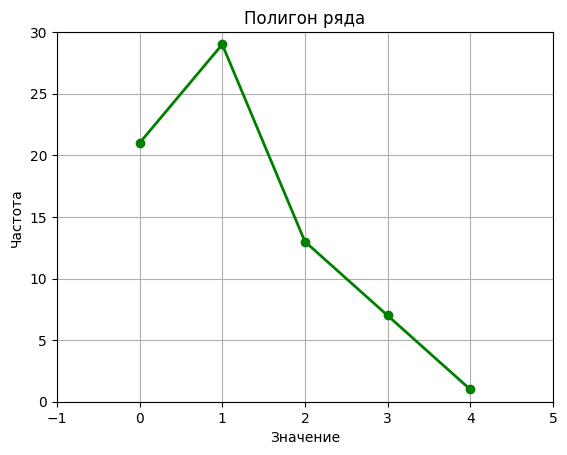

In [35]:
  # подсчитываем частоту каждого значения
  st = sort_ar[0]  # текущее подсчитываемое значение
  cur_sum = 0  # количество элементов текущего значения
  x_a = []  # данные для построение полигона, ось x
  y_a = []  # данные для построение полигона, ось y

  print('\u001b[36;1mЗначение \u001b[34;1m | Частота\u001b[0m \n')

  for i in range(len(sort_ar)):
    if sort_ar[i] == st:
      cur_sum = cur_sum + 1
    else:
      print('\u001b[36;1m      ', st, '\u001b[34;1m | ', cur_sum, '\u001b[0m \n')
      x_a.append(st)
      y_a.append(cur_sum)
      cur_sum = 1
      st = sort_ar[i]

      if i == len(sort_ar) - 1:
        print('\u001b[36;1m      ', st, '\u001b[34;1m | ', cur_sum, '\u001b[0m \n')
        x_a.append(st)
        y_a.append(cur_sum)

  # построение полигона ряда
  plt.axis([-1,5,0,30])
  plt.title('Полигон ряда')
  plt.xlabel('Значение')
  plt.ylabel('Частота')
  plt.plot(x_a, y_a,'go-',linewidth=2.0)
  plt.grid(True)
  plt.show()


***
*   записать эмпирическую функцию распределения и построить ее график
***
Построим эмпирическую функцию распределения:
$$\hat{F}(x)=\frac{1}{n} \sum \limits_{i=1}^n \left[X_i \leq x \right],$$
где $X_i$ -- частоты элементов меньших, чем $x$, $[\, \,]-$ индикаторная функция.

На промежутке $x \in (-\infty, 0]$ $\hat{F}(x)= 0$.

$x \in (0, 1]$ $\hat{F}(x)= \frac{n_1}{n} = \frac{21}{71}$

$x \in (1, 2]$ $\hat{F}(x)= \frac{n_1 + n_2}{n} = \frac{21 + 29}{71}= \frac{50}{71}$

$x \in (2, 3]$ $\hat{F}(x)= \frac{n_1 + n_2 + n_3}{n} = \frac{21 + 29 + 13}{71}= \frac{63}{71}$

$x \in (3, 4]$ $\hat{F}(x)= \frac{n_1 + n_2+ n_3 + n_4}{n} = \frac{21 + 29 + 13 + 7}{71}= \frac{70}{71}$

$x \in (4, +\infty)$ $\hat{F}(x)= \frac{n_1 + n_2+ n_3 + n_4+ n_5}{n} = \frac{21 + 29 + 13 + 7 + 1}{71}= \frac{71}{71} = 1$

В итоге, можно записать:

$$\hat{F}(x)=
\begin{cases}
0, & x \in (-\infty, 0],\\\\
\frac{21}{71}, & x \in (0, 1],\\\\
\frac{50}{71}, & x \in (1, 2],\\\\
\frac{63}{71}, & x \in (2, 3],\\\\
\frac{70}{71}, & x \in (3, 4],\\\\
1, & x \in (4, +\infty)
\end{cases}$$

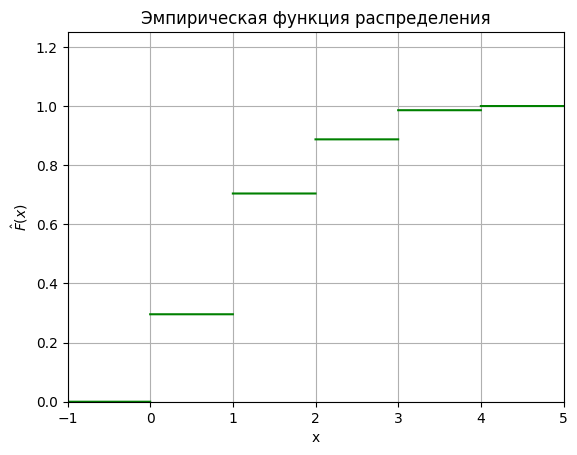

In [26]:
  frec_a = []
  fr_st = 0
  n_a = len(sort_ar)

  # нахождение значений для построения эмпирической функции распределения
  for i in range(len(y_a)):
    fr_st += y_a[i]
    frec_a.append(fr_st)

  # построение графика эмпирической функции распределения
  x_em_a = np.linspace(-7, 7, 1000000)
  delt_a = 0.00001
  x_em_a[(x_em_a > 0 - delt_a) & (x_em_a < 0 + 2 * delt_a) |
         (x_em_a > 1 - delt_a) & (x_em_a < 1 + 2 * delt_a) |
         (x_em_a > 2 - delt_a) & (x_em_a < 2 + 2 * delt_a)|
         (x_em_a > 3 - delt_a) & (x_em_a < 3 + 2 * delt_a)|
         (x_em_a > 4 - delt_a) & (x_em_a < 4 + 2 * delt_a)] = np.nan

  def f_a(x):
    if x <= 0: return 0
    elif 0 < x <= 1: return frec_a[0]
    elif 1 < x <= 2: return frec_a[1]
    elif 2 < x <= 3: return frec_a[2]
    elif 3 < x <= 4: return frec_a[3]
    else: return frec_a[4]

  f_a_v = np.vectorize(f_a)

  plt.axis([-1,5,0,1.25])
  plt.title('Эмпирическая функция распределения')
  plt.xlabel('x')
  plt.ylabel(r'$\hat{F}(x)$')
  plt.plot(x_em_a, f_a_v(x_em_a) / n_a, 'g')
  plt.grid(True)
  plt.show()





***
*   вычислить начальные и центральные эмпирические моменты до 4-го порядка
***
Запишем формулу для вычисления начального эмпирического момента $k$-го порядка:
$$\nu_k = \frac{\sum \limits_1^5 x_i^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.

Формула для вычисления центрального эмпирического момента $k$-го порядка:
$$\mu_k = \frac{\sum \limits_1^5 \left( x_i - \nu_1 \right)^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $\nu_1 -$ начальный эмпирический момент первого порядка, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.


In [16]:
  # нахождение начальных эмпирических моментов
  M = [0., 0., 0., 0., 0.]
  for t in range(5):
    for i in range(len(x_a)):
      M[t] = M[t] + pow(x_a[i], t) * y_a[i]
    M[t] = M[t] / n_a

  # нахождение центральных эмпирических моментов
  M_c = [0., 0., 0., 0., 0.]
  for t in range(5):
    for i in range(len(x_a)):
      M_c[t] = M_c[t] + pow(x_a[i] - M[1], t) * y_a[i]
    M_c[t] = M_c[t] / (n_a)

  for i in range(len(M)):
    print('\u001b[36;1mНачальный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M[i], 3), '\u001b[0m \n')

  print('\u001b[36;1m-----------------------------------------------------------------------\u001b[0m \n')

  for i in range(len(M_c)):
    print('\u001b[36;1mЦентральный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M_c[i], 3), '\u001b[0m \n')


Начальный эмпирический момент порядка  0 :   1.0  

Начальный эмпирический момент порядка  1 :   1.127  

Начальный эмпирический момент порядка  2 :   2.254  

Начальный эмпирический момент порядка  3 :   5.437  

Начальный эмпирический момент порядка  4 :   14.93  

----------------------------------------------------------------------- 

Центральный эмпирический момент порядка  0 :   1.0  

Центральный эмпирический момент порядка  1 :   -0.0  

Центральный эмпирический момент порядка  2 :   0.984  

Центральный эмпирический момент порядка  3 :   0.68  

Центральный эмпирический момент порядка  4 :   2.757  



***
*   найти моду, медиану, коэффициенты асимметрии и эксцесса
***
**Мода**:
одно или несколько значений во множестве наблюдений, которое встречается наиболее часто.

**Медиана** : это число, сумма расстояний (или, если более строго, модулей) от которого до всех чисел из набора минимальна. Для выборки нечетного размера соответствует числу в центре отсортированного массива, для четного $-$ среднему арифметическому центральных элментов отсортированной выборки.


**Коэффициент асимметрии** :
$$As = \frac{\mu_{3}}{\sigma^3} = \frac{\mu_{3}}{{\mu_2}^{3/2}},$$
где $\mu_{3}-$центральный эмпирический момент 3-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выбоки А коэффициент асимметрии положителен (см. результаты вычислений ниже), следовательно, правый хвост графика распределения должен быть длинее левого.*

**Коэффициент эксцесса** :
$$E = \frac{\mu_{4}}{\sigma^4} - 3 = \frac{\mu_{4}}{{\mu_2}^2} - 3,$$
где $\mu_{4}-$центральный эмпирический момент 4-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выборки А коэффициент эксцесса отрицателен, следовательно, пик около математического ожидания более гладкий, чем у нормального распределения.*

In [17]:
  # нахождение моды
  max_a_freq = 0
  Mode_a = 0
  count_modes = 0

  for i in range(len(y_a)):
    max_a_freq = max(max_a_freq, y_a[i])

  for i in range(len(y_a)):
    if max_a_freq == y_a[i]:
      Mode_a += x_a[i]
      count_modes += 1

  Mode_a /= count_modes

  # нахождение медианы
  Med_a = sort_ar[n_a // 2]
  # нахождение коэффициента асимметрии
  As_a = M_c[3] / (M_c[2] ** (3 / 2))

  # нахождение коэффициента эксцесса
  E_a = M_c[4] / (M_c[2] ** 2.) - 3

  print('\u001b[36;1mМода: \u001b[34;1m', Mode_a, '\u001b[0m \n')
  print('\u001b[36;1mМедиана: \u001b[34;1m', Med_a, '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент асимметрии: \u001b[34;1m', round(As_a, 3), '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент эксцесса: \u001b[34;1m', round(E_a, 3), '\u001b[0m \n')



Мода:  1.0  

Медиана:  1  

Коэффициент асимметрии:  0.697  

Коэффициент эксцесса:  -0.152  



***
*   сделать выводы и сформулировать гипотезы о распределении генеральной совокупности, из которой извлечена выборка, оценить параметры этого распределения
***
*Так как и коэффициенты асимметрии и эксцесса близки к нулю, можно выдвинуть гипотезу о том, что генеральная совокупность распределена нормально. Мода, медиана и математическое ожидание (начальный момент первого порядка) близки между собой и равны соответственно $1$, $1$, $1.127.$*

# ✨***Задание 2***
***

*   указать максимальный и минимальный элементы выборки, найти размах выборки
***
Отсортируем выборку по возрастастанию и выведем первый, последний элемент и модуль их разности, это и будет минимальный, максимальный элементы и размах выборки соответственно.

In [6]:
# открытие файла с выборкой B для чтения
with open('/content/drive/MyDrive/MS_lab_1/ms_lab1_B.txt', 'r') as f_b:
  # запись всех целочисленных элементов в массив
  br = [int(i) for i in f_b.read().split()]
  # сортировка массива по возрастанию
  sort_br = sorted(br)
  # вывод минимального элемента выборки
  print('\u001b[36;1m Минимальный элемент выборки: \u001b[34;1m', sort_br[0], '\u001b[0m \n')
  # вывод максимального элемента выборки
  print('\u001b[36;1m Максимальный элемент выборки: \u001b[34;1m', sort_br[-1], '\u001b[0m \n')
  # вывод размаха выборки
  print('\u001b[36;1m Размах выборки: \u001b[34;1m', sort_br[-1] - sort_br[0], '\u001b[0m \n')

 Минимальный элемент выборки:  -91  

 Максимальный элемент выборки:  -21  

 Размах выборки:  70  



***
*   определить оптимальное количество интервалов группировки и длину интервала группировки
***

Для определения оптимального числа интервалов $n$ воспользуемся **правилом Стёрджеса**:
$$n = 1 + \lfloor \log_2 N\rfloor,$$
где $N-$размер выборки.

In [7]:
  # количество элементов в выборке
  N = len(br)
  # определение оптимального числа интервалов
  n = 1 + floor(np.log2(N))
  # длина интервала группировки
  ln_b = ceil((sort_br[-1] - sort_br[0]) / n)

  print('\u001b[36;1mКоличество элементов в выборке: \u001b[34;1m', N, '\u001b[0m \n')
  print('\u001b[36;1mЧисло интервалов: \u001b[34;1m', n, '\u001b[0m \n')
  print('\u001b[36;1mДлина интервала группировки: \u001b[34;1m', ln_b, '\u001b[0m \n')

Количество элементов в выборке:  184  

Число интервалов:  8  

Длина интервала группировки:  9  



***
*   построить интервальный ряд и гистограмму, а также полигон ряда
***

   Интервал   | Центр | Число элементов 

[ -91 , -82 ) | -86.5 |    6  

[ -82 , -73 ) | -77.5 |    15  

[ -73 , -64 ) | -68.5 |    41  

[ -64 , -55 ) | -59.5 |    50  

[ -55 , -46 ) | -50.5 |    37  

[ -46 , -37 ) | -41.5 |    22  

[ -37 , -28 ) | -32.5 |    10  

[ -28 , -19 ) | -23.5 |    3  

Контрольная сумма:  184  



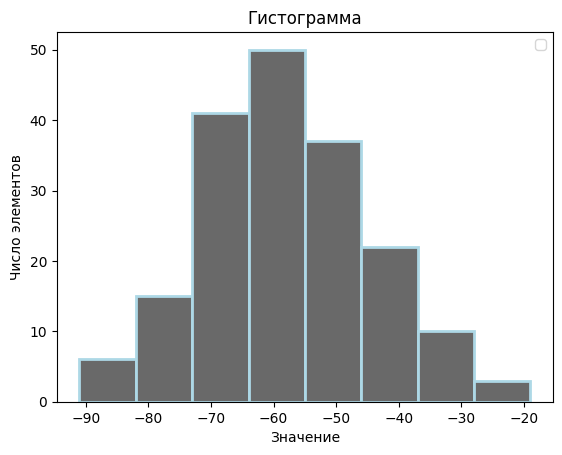

In [8]:
  # создание пустого массива под данные для
  # интервального ряда
  groups_int = [[0] * 4 for i in range(n)]

  # подсчет элементов в каждом из интервалов
  cur_limit = 0
  for i in range(n):
    for j in range(cur_limit, N):
      left_br, groups_int[i][0] = sort_br[0] + i * ln_b, sort_br[0] + i * ln_b
      right_br, groups_int[i][1] = sort_br[0] + (i + 1) * ln_b, sort_br[0] + (i + 1) * ln_b
      cent, groups_int[i][2] = (left_br + right_br) / 2, (left_br + right_br) / 2

      if left_br <= sort_br[j] < right_br:
        groups_int[i][3] += 1
        cur_limit = j + 1
      else:
        break
  # вывод данных интервального ряда
  dat_spec = [0] * 9
  res = 0
  print('\u001b[34;1m   Интервал   \u001b[36;1m| Центр \u001b[32;1m| Число элементов\u001b[0m \n')
  for i in range(n):
    print('\u001b[34;1m[', groups_int[i][0], ',' , groups_int[i][1],
          ') \u001b[36;1m|', groups_int[i][2],'\u001b[32;1m|   ',
          groups_int[i][3], '\u001b[0m \n')
    res += groups_int[i][3]
    dat_spec[i] = groups_int[i][0]
  print('\u001b[32;1mКонтрольная сумма: \u001b[34;1m', res, '\u001b[0m \n')
  dat_spec[8] = groups_int[7][1]


  # построение гистограммы
  groups_int = np.array(groups_int)
  plt.bar( groups_int[:, 2], groups_int[:, 3], width=9, linewidth=2, edgecolor='lightblue', color='dimgray')
  plt.xlabel('Значение')
  plt.ylabel('Число элементов')
  plt.title('Гистограмма')
  plt.legend()
  plt.show()




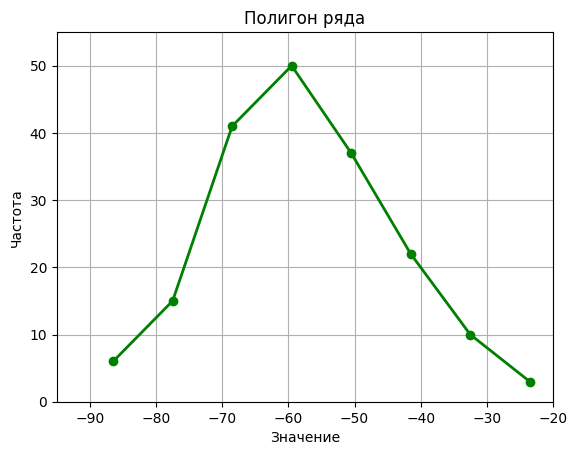

In [33]:
  # построение полигона ряда
  # подсчитываем частоту каждого значения
  st_b = sort_br[0]  # текущее подсчитываемое значение
  cur_sum = 0  # количество элементов текущего значения
  x_b = []  # данные для построение полигона, ось x
  y_b = []  # данные для построение полигона, ось y


  for i in range(len(sort_br)):
    if sort_br[i] == st_b:
      cur_sum = cur_sum + 1
    else:
      x_b.append(st_b)
      y_b.append(cur_sum)
      cur_sum = 1
      st_b = sort_br[i]

      if i == len(sort_br) - 1:
        x_b.append(st_b)
        y_b.append(cur_sum)

  # построение полигона ряда
  plt.axis([-95,-20,0,55])
  plt.title('Полигон ряда')
  plt.xlabel('Значение')
  plt.ylabel('Частота')
  plt.plot(groups_int[:, 2], groups_int[:, 3], 'go-',linewidth=2.0)
  plt.grid(True)
  plt.show()

***
*   записать эмпирическую функцию распределения и построить ее график, построить кумуляту
***

Построим эмпирическую функцию распределения:
$$\hat{F}(x)=\frac{1}{n} \sum \limits_{i=1}^n \left[X_i \leq x \right],$$
где $X_i$ -- частоты элементов меньших, чем $x$, $[\, \,]-$ индикаторная функция.

На промежутке $x \in (-\infty, -91]$ $\hat{F}(x)= 0$.

$x \in (-91, -82]$ $\hat{F}(x)=\frac{6}{184}$

$x \in (-82, -73]$ $\hat{F}(x)= \frac{21}{184}$

$x \in (-73, -64]$ $\hat{F}(x)= \frac{62}{184}$

$x \in (-64, -55]$ $\hat{F}(x)= \frac{112}{184}$

$x \in (-55, -46]$ $\hat{F}(x)= \frac{149}{184}$

$x \in (-46, -37]$ $\hat{F}(x)= \frac{171}{184}$

$x \in (-37, -28]$ $\hat{F}(x)= \frac{181}{184}$

$x \in (-28, -19]$ $\hat{F}(x)= \frac{184}{184} = 1$

$x \in (19, +\infty)$ $\hat{F}(x)= \frac{184}{184} = 1$

В итоге, можно записать:

$$\hat{F}(x)=
\begin{cases}
0, & x \in (-\infty, -91],\\\\
\frac{21}{71}, & x \in (-91, -82],\\\\
\frac{50}{71}, & x \in (-82, -73],\\\\
\frac{63}{71}, & x \in (-73, -64],\\\\
\frac{70}{71}, & x \in (-64, -55],\\\\
\frac{21}{71}, & x \in (-55, -46],\\\\
\frac{50}{71}, & x \in (-46, -37],\\\\
\frac{63}{71}, & x \in (-37, -28],\\\\
\frac{70}{71}, & x \in (-28, -19],\\\\
1, & x \in (-19, +\infty)
\end{cases}$$

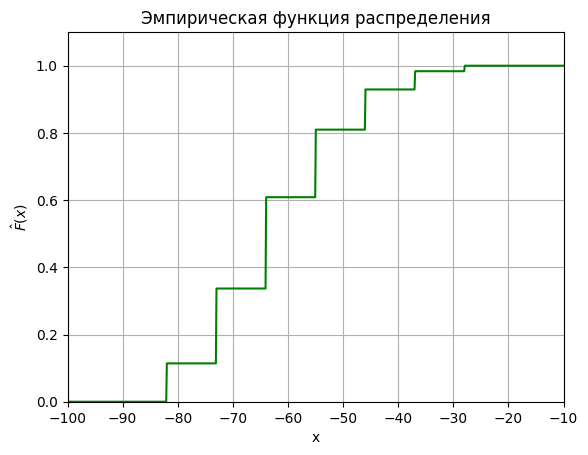

In [40]:
  frec_b = []
  fr_st_b = 0
  n_b = len(sort_br)

  # нахождение значений для построения эмпирической функции распределения
  for i in range(len(groups_int)):
    fr_st_b += groups_int[i][3]
    frec_b.append(fr_st_b)

  # построение графика эмпирической функции распределения
  x_em_b = np.linspace(-100, -10, 800)


  def f_b(x):
    if x <= groups_int[0][0]:
      return 0
    if x > groups_int[-1][1]:
      return frec_b[-1]
    for i in range(1, len(groups_int)):
      if groups_int[i][0] < x <= groups_int[i][1]:
        return frec_b[i]
    return 0


  f_b_v = np.vectorize(f_b)

  plt.axis([-100,-10,0,1.1])
  plt.title('Эмпирическая функция распределения')
  plt.xlabel('x')
  plt.ylabel(r'$\hat{F}(x)$')
  plt.plot(x_em_b, f_b_v(x_em_b) / n_b, 'g') # да, что не так с этим массивом
  plt.grid(True)
  plt.show()


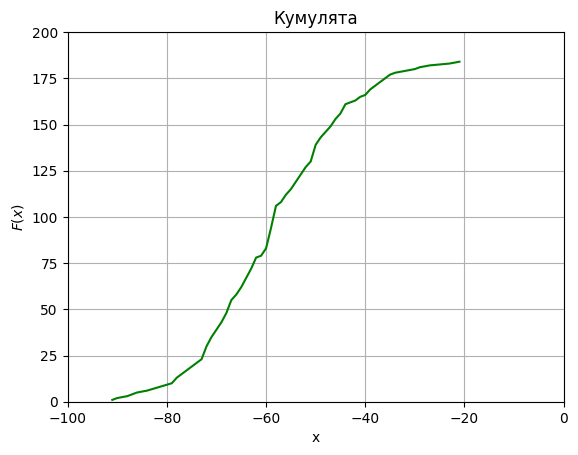

In [43]:
  # построение кумуляты

  fr_b = []
  st_b_c = 0

  for i in range(len(y_b)):
    st_b_c += y_b[i]
    fr_b.append(st_b_c)


  plt.axis([-100,0,0, 200])
  plt.title('Кумулята')
  plt.xlabel('x')
  plt.ylabel(r'$F(x)$')
  plt.plot(x_b, fr_b, 'g')
  plt.grid(True)
  plt.show()

***
*   вычислить начальные и центральные эмпирические моменты до 4-го порядка
***

Запишем формулу для вычисления начального эмпирического момента $k$-го порядка:
$$\nu_k = \frac{\sum \limits_1^5 x_i^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.

Формула для вычисления центрального эмпирического момента $k$-го порядка:
$$\mu_k = \frac{\sum \limits_1^5 \left( x_i - \nu_1 \right)^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $\nu_1 -$ начальный эмпирический момент первого порядка, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.

In [ ]:
  # нахождение начальных эмпирических моментов
  M_b = [0., 0., 0., 0., 0.]
  for t in range(5):
    for i in range(len(x_b)):
      M_b[t] = M_b[t] + pow(x_b[i], t) * y_b[i]
    M_b[t] = M_b[t] / n_b

  # нахождение центральных эмпирических моментов
  M_c_b = [0., 0., 0., 0., 0.]
  for t in range(5):
    for i in range(len(x_b)):
      M_c_b[t] = M_c_b[t] + pow(x_b[i] - M_b[1], t) * y_b[i]
    M_c_b[t] = M_c_b[t] / (n_b)

  for i in range(len(M_b)):
    print('\u001b[36;1mНачальный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M_b[i], 3), '\u001b[0m \n')

  print('\u001b[36;1m-----------------------------------------------------------------------\u001b[0m \n')

  for i in range(len(M_c_b)):
    print('\u001b[36;1mЦентральный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M_c_b[i], 3), '\u001b[0m \n')




Начальный эмпирический момент порядка  0 :   1.0  

Начальный эмпирический момент порядка  1 :   -58.293  

Начальный эмпирический момент порядка  2 :   3577.533  

Начальный эмпирический момент порядка  3 :   -229026.576  

Начальный эмпирический момент порядка  4 :   15196881.228  

----------------------------------------------------------------------- 

Центральный эмпирический момент порядка  0 :   1.0  

Центральный эмпирический момент порядка  1 :   -0.0  

Центральный эмпирический момент порядка  2 :   179.403  

Центральный эмпирический момент порядка  3 :   436.293  

Центральный эмпирический момент порядка  4 :   93520.68  



***
*   найти моду (отметить на гистограмме), медиану (отметить на кумуляте), коэффициенты асимметрии и эксцесса
***
**Мода**:
одно или несколько значений во множестве наблюдений, которое встречается наиболее часто.

**Медиана** : это число, сумма расстояний (или, если более строго, модулей) от которого до всех чисел из набора минимальна. Для выборки нечетного размера соответствует числу в центре отсортированного массива, для четного $-$ среднему арифметическому центральных элментов отсортированной выборки.


**Коэффициент асимметрии** :
$$As = \frac{\mu_{3}}{\sigma^3} = \frac{\mu_{3}}{{\mu_2}^{3/2}},$$
где $\mu_{3}-$центральный эмпирический момент 3-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выбоки B коэффициент асимметрии положителен (см. результаты вычислений ниже), следовательно, правый хвост графика распределения должен быть длинее левого.*

**Коэффициент эксцесса** :
$$E = \frac{\mu_{4}}{\sigma^4} - 3 = \frac{\mu_{4}}{{\mu_2}^2} - 3,$$
где $\mu_{4}-$центральный эмпирический момент 4-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выборки B коэффициент эксцесса отрицателен, следовательно, пик около математического ожидания более гладкий, чем у нормального распределения.*

In [ ]:
  # нахождение моды
  max_b_freq = 0
  Mode_b = 0
  count_modes_b = 0

  for i in range(len(y_b)):
    max_b_freq = max(max_b_freq, y_b[i])

  for i in range(len(y_b)):
    if max_b_freq == y_b[i]:
      Mode_b += x_b[i]
      count_modes_b += 1

  Mode_b /= count_modes_b

  # нахождение медианы
  Med_b = sort_br[n_b // 2]
  # нахождение коэффициента асимметрии
  As_b = M_c_b[3] / (M_c_b[2] ** (3 / 2))

  # нахождение коэффициента эксцесса
  E_b = M_c_b[4] / (M_c_b[2] ** 2.) - 3

  print('\u001b[36;1mМода: \u001b[34;1m', Mode_b, '\u001b[0m \n')
  print('\u001b[36;1mМедиана: \u001b[34;1m', Med_b, '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент асимметрии: \u001b[34;1m', round(As_b, 3), '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент эксцесса: \u001b[34;1m', round(E_b, 3), '\u001b[0m \n')

Мода:  -58.0  

Медиана:  -59  

Коэффициент асимметрии:  0.182  

Коэффициент эксцесса:  -0.094  



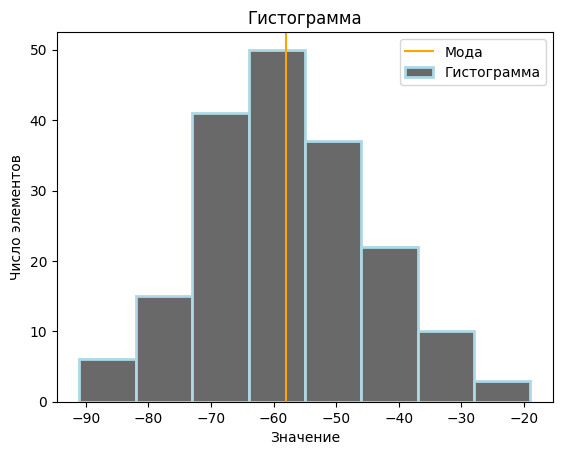

In [ ]:
  # построение гистограммы с отметкой моды
  groups_int = np.array(groups_int)
  plt.bar( groups_int[:, 2], groups_int[:, 3], width=9, linewidth=2, edgecolor='lightblue', color='dimgray', label='Гистограмма')
  plt.xlabel('Значение')
  plt.ylabel('Число элементов')
  plt.title('Гистограмма')
  plt.axvline(x=Mode_b, color='orange', label='Мода')
  plt.legend()
  plt.show()

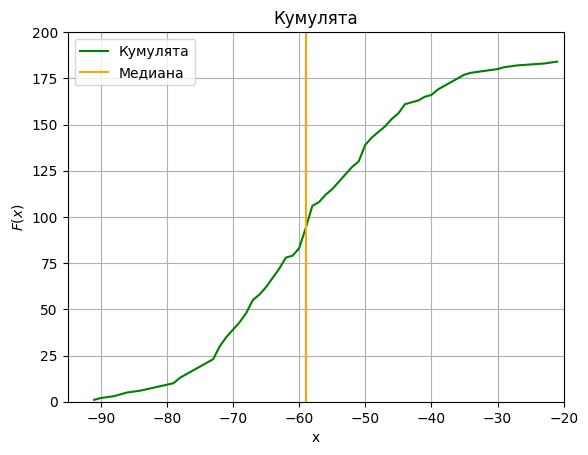

In [ ]:
  # построение кумуляты с отметкой медианы

  plt.axis([-95,-20,0, 200])
  plt.title('Кумулята')
  plt.xlabel('x')
  plt.ylabel(r'$F(x)$')
  plt.plot(x_b, frec_b, 'g', label='Кумулята')
  plt.grid(True)
  '''plt.annotate('', xy=(Med_b, 0),  xycoords='data',
            xytext=(Med_b, 130),
            arrowprops=dict(facecolor='g', arrowstyle='-'))
  plt.annotate(r'Медиана, $x=-59$', xy=(Med_b, 130),  xycoords='data',
            xytext=(Med_b, 185),
            arrowprops=dict(facecolor='g', arrowstyle='->'), label='uu')
  '''
  plt.axvline(x=Med_b, color='orange', label='Медиана')
  plt.legend()
  plt.show()

***
*   сделать выводы и сформулировать гипотезы о распределении генеральной совокупности, из которой извлечена выборка, оценить параметры этого распределения
***

*Так как и коэффициенты асимметрии и эксцесса близки к нулю, можно выдвинуть гипотезу о том, что генеральная совокупность распределена нормально. Форма гистограммы также близка к нормальному закону распределения. Мода, медиана и математическое ожидание (начальный момент первого порядка) близки между собой и равны соответственно $-58$, $-59$, $-58.293$.*